In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

# Load data
df = pd.read_csv("Document from Anjali Rajput.csv")
print (df)



from sklearn.linear_model import LogisticRegression

# manually add intercept
df['intercept'] = 1
independent_variables = ['Hours_Studied', 'intercept']

x = df[independent_variables]       # independent variable
y = df['Result']                      # dependent variable 

# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression(solver='lbfgs')
model = model.fit(x, y)

'''The “lbfgs” is an optimization algorithm that approximates the Broyden–Fletcher–Goldfarb–Shanno 
algorithm8, which belongs to quasi-Newton methods. The “lbfgs” solver is recommended for use for 
small data-sets but for larger datasets its performance suffers.
The “lbfgs” solver is used by default for its robustness. For large datasets the “saga” solver is 
usually faster. For large dataset, you may also consider using SGDClassifier with ‘log’ loss, which 
might be even faster but requires more tuning.'''
# check the accuracy on the training set
model.score(x, y)

# predict_proba will return array containing probability of y = 0 and y = 1
print ('Predicted probability:', model.predict_proba(x)[:,1])

# predict will give convert the probability(y=1) values > .5 to 1 else 0  
print ('Predicted Class:',model.predict(x))

# plotting fitted line
plt.scatter(df.Hours_Studied, y,  color='black')
plt.yticks([0.0, 0.5, 1.0])
plt.plot(df.Hours_Studied, model.predict_proba(x)[:,1], color='blue', linewidth=3)
plt.title('Hours Studied vs Result - Fitted Line')
plt.ylabel('Result')
plt.xlabel('Hours_Studied')
plt.show()



from sklearn import metrics

# generate evaluation metrics
print ("Accuracy :", metrics.accuracy_score(y, model.predict(x)))
print ("AUC :", metrics.roc_auc_score(y, model.predict_proba(x)[:,1]))

print ("Confusion matrix :",metrics.confusion_matrix(y, model.predict(x)))
print ("classification report :", metrics.classification_report(y, model.predict(x)))




# Determine the false positive and true positive rates
fpr, tpr, _ = metrics.roc_curve(y, model.predict_proba(x)[:,1])
 
# Calculate the AUC
roc_auc = metrics.auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()



# instantiate a logistic regression model with default c value, and fit with X and y
model = LogisticRegression(solver='lbfgs')
model = model.fit(x, y)

# check the accuracy on the training set
print ("C = 1 (default), Accuracy :", metrics.accuracy_score(y, model.predict(x)))

# instantiate a logistic regression model with c = 10, and fit with X and y
model1 = LogisticRegression(solver='lbfgs',C=10)
model1 = model1.fit(x, y)

# check the accuracy on the training set
print ("C = 10, Accuracy :", metrics.accuracy_score(y, model1.predict(x)))

# instantiate a logistic regression model with c = 100, and fit with X and y
model2 = LogisticRegression(solver='lbfgs',C=100)
model2 = model2.fit(x, y)

# check the accuracy on the training set
print ("C = 100, Accuracy :", metrics.accuracy_score(y, model2.predict(x)))

# instantiate a logistic regression model with c = 1000, and fit with X and y
model3 = LogisticRegression(solver='lbfgs',C=1000)
model3 = model3.fit(x, y)

# check the accuracy on the training set
print ("C = 1000, Accuracy :", metrics.accuracy_score(y, model3.predict(x)))

# plotting fitted line
plt.scatter(df.Hours_Studied, y,  color='black', label='Result')
plt.yticks([0.0, 0.5, 1.0])
plt.plot(df.Hours_Studied, model.predict_proba(x)[:,1], color='gray', linewidth=2, label='C=1.0')
plt.plot(df.Hours_Studied, model1.predict_proba(x)[:,1], color='blue', linewidth=2,label='C=10')
plt.plot(df.Hours_Studied, model2.predict_proba(x)[:,1], color='green', linewidth=2,label='C=100')
plt.plot(df.Hours_Studied, model3.predict_proba(x)[:,1], color='red', linewidth=2,label='C=1000')
plt.legend(loc='lower right') # legend location
plt.title('Hours Studied vs Result')
plt.ylabel('Result')
plt.xlabel('Hours_Studied')
plt.show()

   Hours_Studied  Test_Grade
0              2          57
1              3          66
2              4          73
3              5          76
4              6          79
5              7          81
6              8          90
7              9          96
8             10         100


KeyError: 'Result'

In [6]:
# Load data
df = pd.read_csv("Document from Anjali Rajput.csv")
print (df)



   Hours_Studied  Test_Grade
0              2          57
1              3          66
2              4          73
3              5          76
4              6          79
5              7          81
6              8          90
7              9          96
8             10         100


In [7]:
# Load data
df = pd.read_csv("Document from Anjali Rajput.csv")
df


,Hours_Studied,Test_Grade
0,2,57
1,3,66
2,4,73
3,5,76
4,6,79
5,7,81
6,8,90
7,9,96
8,10,100


   Hours_Studied  Test_Grade
0              2          57
1              3          66
2              4          73
3              5          76
4              6          79
5              7          81
6              8          90
7              9          96
8             10         100


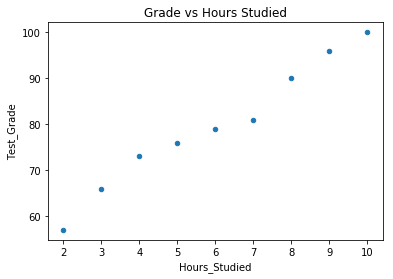

Correlation Matrix: 
               Hours_Studied  Test_Grade
Hours_Studied       1.000000    0.987797
Test_Grade          0.987797    1.000000


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


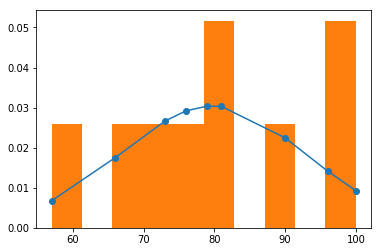

Intercept:  49.67777777777776
Coefficient:  [5.01666667]
Manual prediction : 79.77777779777776
Using predict function:  [79.77777778]
Sum of SSR: 1510.0166666666673
Sum of SST: 1547.5555555555557
   Hours_Studied  Test_Grade  Test_Grade_Pred         SST         SSR
0              2          57        59.711111  518.827160  402.671111
1              3          66        64.727778  189.827160  226.502500
2              4          73        69.744444   45.938272  100.667778
3              5          76        74.761111   14.271605   25.166944
4              6          79        79.777778    0.604938    0.000000
5              7          81        84.794444    1.493827   25.166944
6              8          90        89.811111  104.493827  100.667778
7              9          96        94.827778  263.160494  226.502500
8             10         100        99.844444  408.938272  402.671111
R Squared using manual calculation:  0.9757431074095351
R Squared using built-in function:  0.9757431074

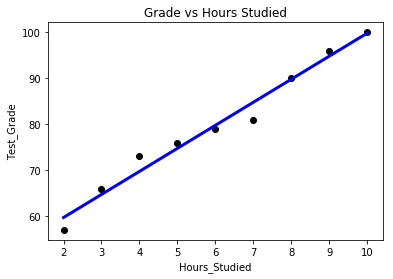

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
# importing linear regression function
import sklearn.linear_model as lm
# function to calculate r-squared, MAE, RMSE
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error
%matplotlib inline

# Load data
df = pd.read_csv("Document from Anjali Rajput.csv")
df
# Simple scatter plot
df.plot(kind='scatter', x='Hours_Studied', y='Test_Grade', title='Grade vs Hours Studied')
plt.show()
# check the correlation between variables
print("Correlation Matrix: ")
print(df.corr())
# Lets plot the distribution
fit = stats.norm.pdf(df.Test_Grade, np.mean(df.Test_Grade), np.std(df.Test_Grade))  
plt.plot(df.Test_Grade,fit,'-o')
plt.hist(df.Test_Grade,normed=True)     
plt.show()


# Create linear regression object
lr = lm.LinearRegression()
x= df.Hours_Studied[:, np.newaxis] # independent variable
y= df.Test_Grade.values            # dependent variable 
# Train the model using the training sets
lr.fit(x, y)
print("Intercept: ", lr.intercept_)
print("Coefficient: ", lr.coef_)
# manual prediction for a given value of x
print("Manual prediction :", 49.67777777777776 + 5.01666667*6)
# predict using the built-in function
print("Using predict function: ", lr.predict([[6]]))
# plotting fitted line
plt.scatter(x, y,  color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=3)
plt.title('Grade vs Hours Studied')
plt.ylabel('Test_Grade')
plt.xlabel('Hours_Studied')

# Let's check the performance of fitted model through R-squared

# add predict value to the data frame
df['Test_Grade_Pred'] = lr.predict(x)

# Manually calculating R Squared
df['SST'] = np.square(df['Test_Grade'] - df['Test_Grade'].mean())
df['SSR'] = np.square(df['Test_Grade_Pred'] - df['Test_Grade'].mean())

print("Sum of SSR:", df['SSR'].sum())
print("Sum of SST:", df['SST'].sum())

print(df)
df.to_csv('r-squared.csv', index=False)

print("R Squared using manual calculation: ", df['SSR'].sum() / df['SST'].sum())

# Using built-in function
print("R Squared using built-in function: ", r2_score(df.Test_Grade,  df.Test_Grade_Pred))
print("Mean Absolute Error: ", mean_absolute_error(df.Test_Grade, df.Test_Grade_Pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(df.Test_Grade, 	df.Test_Grade_Pred)))

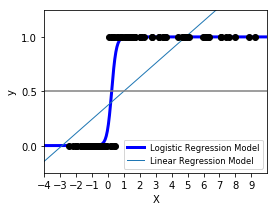

In [10]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
# This is the test set, it's a straight line with some Gaussian noise
xmin, xmax = -10, 10
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)
X = X[:, np.newaxis]
# run the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)
# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-10, 10, 300)

def model(x):
    	return 1 / (1 + np.exp(-x))
loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='blue', linewidth=3)
ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')
plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-10, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'), loc="lower right", fontsize='small')
plt.show()

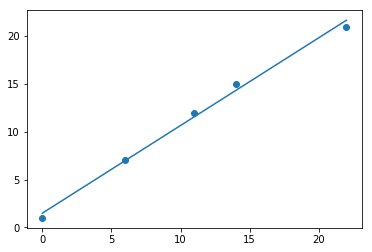

In [14]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
# sample points
X = [0, 6, 11, 14, 22]
Y = [1, 7, 12, 15, 21]
xbar = sum(X)/len(X)
ybar = sum(Y)/len(Y)
n = len(X) # or len(Y)
numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
denum = sum([xi**2 for xi in X]) - n * xbar**2
b = numer / denum
a = ybar - b * xbar

plt.scatter(X, Y)
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit)

In [16]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import graphviz 
from graphviz import Source

# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Create decision tree classifer object
clf = DecisionTreeClassifier(random_state=0)

# Train model
model = clf.fit(X, y)

# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=iris.feature_names,  class_names=iris.target_names)

graph = graphviz.Source(dot_data) 
graph.render("newtree",view = True)

'newtree.pdf'

In [17]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

#Load dataset
diabetes = datasets.load_diabetes()
cancer = datasets.load_breast_cancer()

# print the names of the 13 features
print("Features: ", cancer.feature_names)

# print the label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)


# print data(feature)shape
cancer.data.shape


# print the cancer data features (top 5 records)
print(cancer.data[0:5])


# print the cancer labels (0:malignant, 1:benign)
print(cancer.target)


# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test


#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-

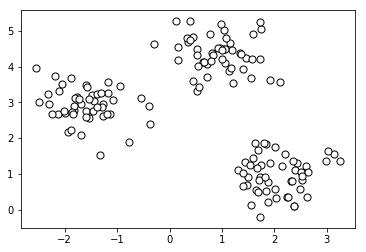

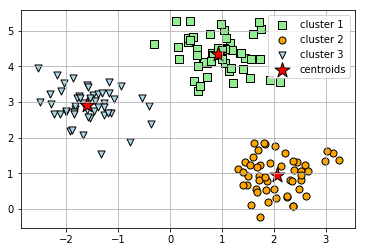

In [18]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# create dataset
X, y = make_blobs(
   n_samples=150, n_features=2,
   centers=3, cluster_std=0.5,
   shuffle=True, random_state=0
)

# plot
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)


# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [19]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.preprocessing import Imputer
# make fake data
features, _ = make_blobs(n_samples = 1000, n_features = 2, random_state = 1)
# standardize the features
scaler = StandardScaler()
standardized_features = scaler.fit_transform(features)
# replace the first feature's first value with a missing value
true_value = standardized_features[0, 0]
standardized_features[0,0] = np.nan
# create imputer
mean_imputer = Imputer(strategy="mean", axis=0)
# impute values
features_mean_imputed = mean_imputer.fit_transform(features)
# compare true and imputed values
print("True Value: {}".format(true_value))
print("Imputed Value: {}".format(features_mean_imputed[0,0]))

True Value: 0.8730186113995938
Imputed Value: -3.058372724614996


In [21]:
# Gaussian Naive Bayes
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
# load the iris datasets
dataset = datasets.load_iris()
# fit a Naive Bayes model to the data
model = GaussianNB()
model.fit(dataset.data, dataset.target)
model
# make predictions
expected = dataset.target
predicted = model.predict(dataset.data)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred).sum()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

   micro avg       0.96      0.96      0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]
Number of mislabeled points out of a total 75 points : 4


[2]


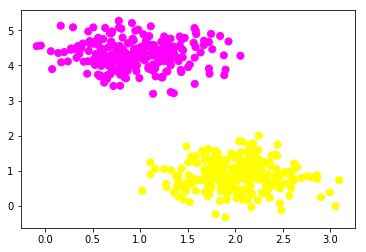

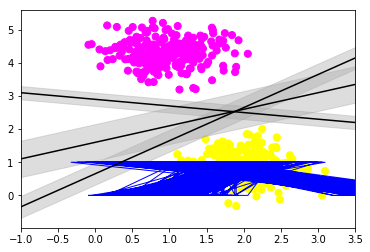

In [22]:
#Let us create a dataset to understand support vector classification:

import numpy as np
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([1, 1, 2, 2])

from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X, y)



prediction = clf.predict([[0,6]])
print(prediction)



from matplotlib import pyplot as plt
# importing scikit learn with make_blobs 
from sklearn.datasets.samples_generator import make_blobs
# creating datasets X containing n_samples
# Y containing two classes
X, Y = make_blobs(n_samples=500, centers=2, random_state=0, cluster_std=0.40)
# plotting scatters
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring');
plt.show()
plt.plot(X, Y, color='blue', linewidth=1)
#print(X,y)




#Support vector machines not only draw a line between two classes, 
#but consider a region about the line of some given width. Here’s an example of what it can look like:

# creating line space between -1 to 3.5 
xfit = np.linspace(-1, 3.5) 
# plotting scatter 
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring')

# plot a line between the different sets of data 
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]: 
    yfit = m * xfit + b 
    plt.plot(xfit, yfit, '-k') 
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', 
    color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);
plt.show()

Coefficients: 
 [941.43097333]
Mean squared error: 3035.06
Variance score: 0.41


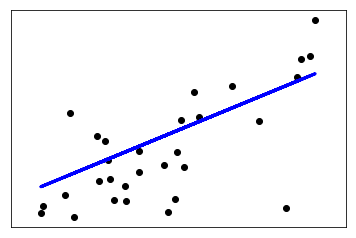

In [23]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
# Load the diabetes dataset
diabetes = datasets.load_diabetes()
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-30]
diabetes_X_test = diabetes_X[-30:]
# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-30]
diabetes_y_test = diabetes.target[-30:]

# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
% mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.91      0.95        11

      micro avg       0.97      0.97      0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



Text(0, 0.5, 'Mean Error')

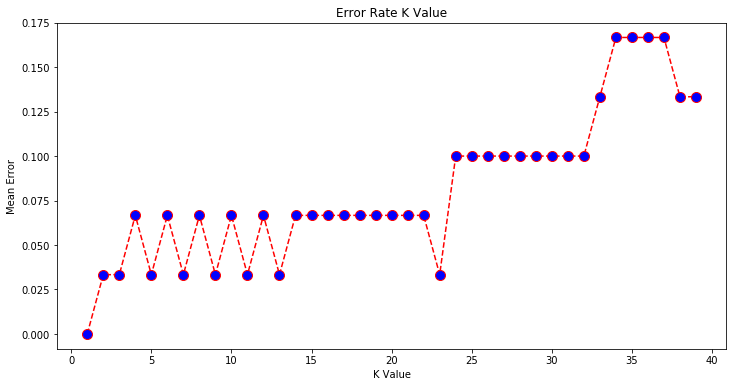

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)
dataset
#dataset.head()



X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

[[  100]
 [  500]
 [ 1500]
 [ 3500]
 [ 5000]
 [ 6000]
 [ 8000]
 [ 9500]
 [12000]
 [14000]
 [15500]
 [16500]
 [25000]
 [30000]]
[ 1000  3000  5000  8000  6500  7000 15000 20000 21000 25000 27000 30000
 52000 80000]
Predicted price:  8000



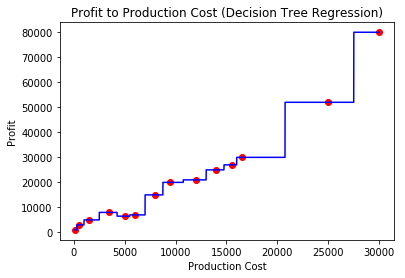

'tree.pdf'

In [27]:
'''Step 1: Import the required libraries.'''
# import numpy package for arrays and stuff 
import numpy as np  
# import matplotlib.pyplot for plotting our result 
import matplotlib.pyplot as plt 
# import pandas for importing csv files  
import pandas as pd

'''Step 2: Initialize and print the Dataset.'''
# import dataset 
# dataset = pd.read_csv('Data.csv')  
# alternatively open up .csv file to read data 
dataset = np.array( 
[['Asset Flip', 100, 1000], 
['Text Based', 500, 3000], 
['Visual Novel', 1500, 5000], 
['2D Pixel Art', 3500, 8000], 
['2D Vector Art', 5000, 6500], 
['Strategy', 6000, 7000], 
['First Person Shooter', 8000, 15000], 
['Simulator', 9500, 20000], 
['Racing', 12000, 21000], 
['RPG', 14000, 25000], 
['Sandbox', 15500, 27000], 
['Open-World', 16500, 30000], 
['MMOFPS', 25000, 52000], 
['MMORPG', 30000, 80000] 
]) 
  
# print the dataset 
#print(dataset) 
dataset

'''Step 3: Select all the rows and column 1 from dataset to “X”.'''
# select all rows by : and column 1 
# by 1:2 representing features 
X = dataset[:, 1:2].astype(int)  
  
# print X 
print(X)

'''Step 4: Select all of the rows and column 2 from dataset to “y”.'''
# select all rows by : and column 2 
# by 2 to Y representing labels 
y = dataset[:, 2].astype(int)  
  
# print y 
print(y)

'''Step 5: Fit decision tree regressor to the dataset'''
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(X, y)


'''Step 6: Predicting a new value'''
# predicting a new value 
# test the output by changing values, like 3750 
y_pred = regressor.predict([[3750]]) 
# print the predicted price 
print("Predicted price: % d\n"% y_pred)

'''Step 7: Visualising the result'''
# arange for creating a range of values  
# from min value of X to max value of X  
# with a difference of 0.01 between two 
# consecutive values 
X_grid = np.arange(min(X), max(X), 0.01) 
  
# reshape for reshaping the data into  
# a len(X_grid)*1 array, i.e. to make 
# a column out of the X_grid values 
X_grid = X_grid.reshape((len(X_grid), 1))  
  
# scatter plot for original data 
plt.scatter(X, y, color = 'red') 
  
# plot predicted data 
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')  
  
# specify title 
plt.title('Profit to Production Cost (Decision Tree Regression)')  
  
# specify X axis label 
plt.xlabel('Production Cost') 
  
# specify Y axis label 
plt.ylabel('Profit') 
  
# show the plot 
plt.show()


'''Step 8: The tree is finally exported and shown in the TREE STRUCTURE below, 
    automatically visualized in .pdf format with name 'tree.pdf' '''

## import export_graphviz 
from sklearn import tree
import graphviz 
from graphviz import Source

dot_data = tree.export_graphviz(regressor, out_file =None, feature_names =['Production Cost'])

graph = graphviz.Source(dot_data) 
graph.render("tree",view = True)

In [28]:
#Import scikit-learn dataset library
from sklearn import datasets
#Load dataset
wine = datasets.load_wine()

# print the names of the 13 features
print ("Features: ", wine.feature_names)

# print the label type of wine(class_0, class_1, class_2)
print ("Labels: ", wine.target_names)

# print data(feature)shape
wine.data.shape

# print the wine data features (top 5 records)
print (wine.data[0:5])

# print the wine labels (0:Class_0, 1:class_2, 2:class_2)
print (wine.target)

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3,random_state=109) 
# 70% training and 30% test

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']
[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0